# Haberman's Survival: Exploratory Data Analysis

Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to download data.(https://www.kaggle.com/gilsousa/habermans-survival-data-set)

Information about the dataset :

The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.


Attribute Information :

- Age of patient at time of operation (numerical) 
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute)
    - 1 = the patient survived 5 years or longer
    - 2 = the patient died within 5 year

## Setting Up The Project

In [4]:
# importing all required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust

In [5]:
# Loading the data as haberman pandas dataframe
haberman = pd.read_csv("./haberman.csv")

In [6]:
sns.set()

In [7]:
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


## Data Preparation

In [9]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Observations :
- There are no 'Null' values present and thus no need to handle them.
- The values present in 'status' column is replaced with more meaningful values. They are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)
- The columns are replaced with more meaningful descriptive names.

In [11]:
# print unique values present in status column.
haberman['status'].unique()

array([1, 2], dtype=int64)

In [12]:
# replacing the values in 'status' column with more meaningful values
haberman['status'] = haberman['status'].map({1:"yes", 2:"no"})

In [13]:
# changing the type of 'status' column to 'category'
haberman['status'] = haberman['status'].astype('category')

In [14]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     306 non-null    int64   
 1   year    306 non-null    int64   
 2   nodes   306 non-null    int64   
 3   status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [15]:
# change the column names
haberman = haberman.rename(columns={"year": "year_of_operation", "nodes": "num_of_positive_axillary_nodes",'status':'survived_5_yrs'})

## High level Statistics

In [17]:
# (Q) how many data-points and features?
a,b = haberman.shape
print('There are {0} data-points and {1} features/attributes(including the class attribute).'.format(a,b))
# --> there are 306 data-points and 4 features/attributes(including the class attribute)

#(Q) What are the column names in our dataset?
print('The column names are',', '.join(haberman.columns),'.')
# --> ['age', 'year', 'nodes', 'status']

There are 306 data-points and 4 features/attributes(including the class attribute).
The column names are age, year_of_operation, num_of_positive_axillary_nodes, survived_5_yrs .


In [18]:
# there is only one Label/Depdendent-variable/Output-varible/Class/Class-label/Response label/class attribute
# there are three Feature/Variable/Input-variable/Independent-varibale/attribute

In [19]:
#(Q) How many data points for each class are present?
print(haberman['survived_5_yrs'].value_counts(),'\n')
print('*'*50)
haberman['survived_5_yrs'].value_counts(normalize=True)

survived_5_yrs
yes    225
no      81
Name: count, dtype: int64 

**************************************************


survived_5_yrs
yes    0.735294
no     0.264706
Name: proportion, dtype: float64

In [20]:
# this means that the dataset is an imbalanced dataset

In [21]:
print(haberman.describe())

              age  year_of_operation  num_of_positive_axillary_nodes
count  306.000000         306.000000                      306.000000
mean    52.457516          62.852941                        4.026144
std     10.803452           3.249405                        7.189654
min     30.000000          58.000000                        0.000000
25%     44.000000          60.000000                        0.000000
50%     52.000000          63.000000                        1.000000
75%     60.750000          65.750000                        4.000000
max     83.000000          69.000000                       52.000000


Observations :

- There are patients from age 30 to 83. And 75% of them are below 60.75 years.
- The oldest year of operation is 1958 and latest is 1969 with 75% of the patients getting operated before 1966.
- Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes.
- The target column / class variable / class attribute is imbalanced with 73% of 'yes' that is 225 out of 306 values.

## Objectives

Our Objective
- is analyzing and visualizing data to understand its key characteristics,
- discover patterns,
- and identify relationships between variables,

Inorder to come up with supporting insights relating to patient survival after taking cancer treatment.

AND

To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes.

## Uni-Variate Analysis

* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing the number of data points that
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothened version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the curve denotes the percentage of data points under the corresponding group.

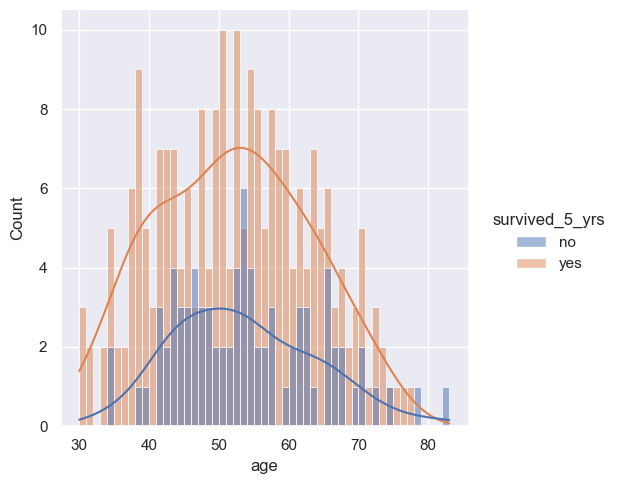

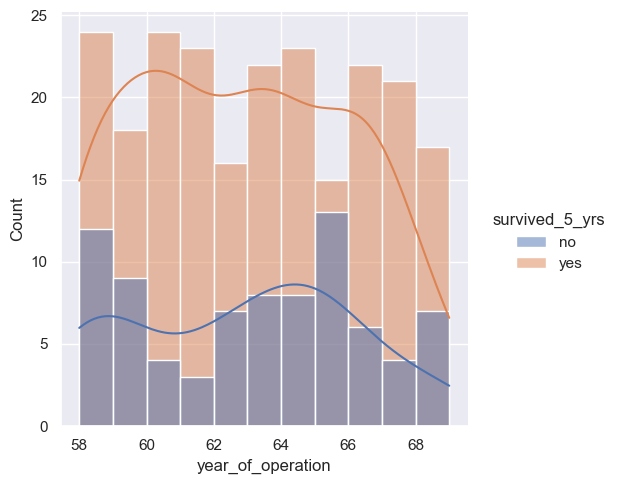

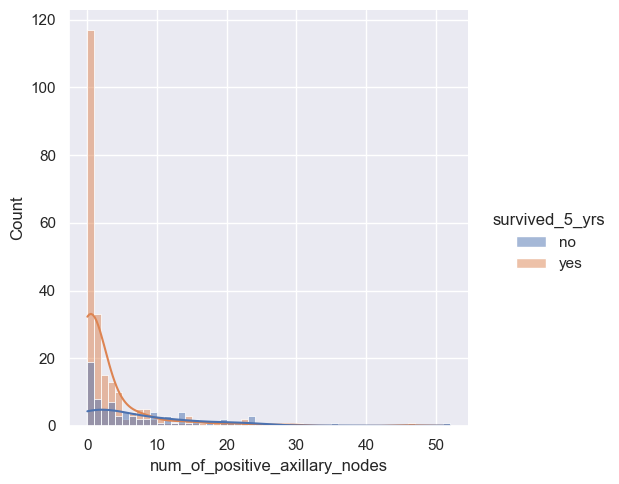

In [27]:
# 1. histograms + PDFs(KDE's)

for feature in haberman.columns[:-1] :
    sns.displot(data=haberman, x=feature, hue="survived_5_yrs", binwidth=1, kde=True)

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year_of_operation *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* num_of_positive_axillary_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.9934640

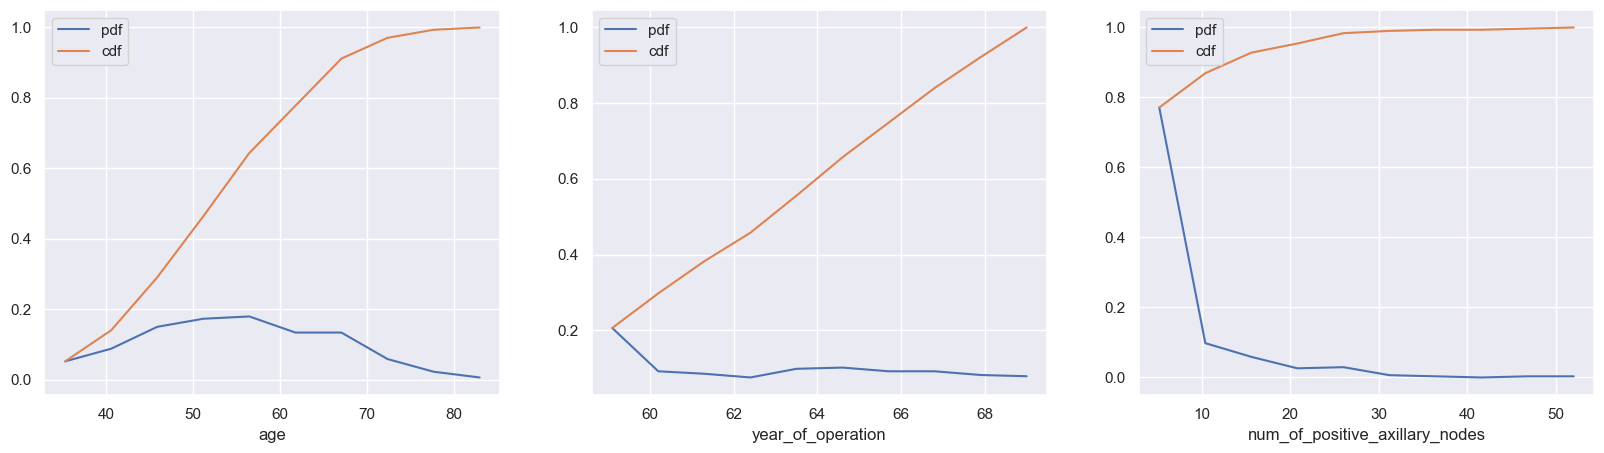

In [28]:
# 2. CDFs

"""
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.
"""

plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(haberman[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, label = 'pdf')
    plt.plot(bin_edges[1:], cdf, label = 'cdf')
    plt.legend()
    plt.xlabel(feature)

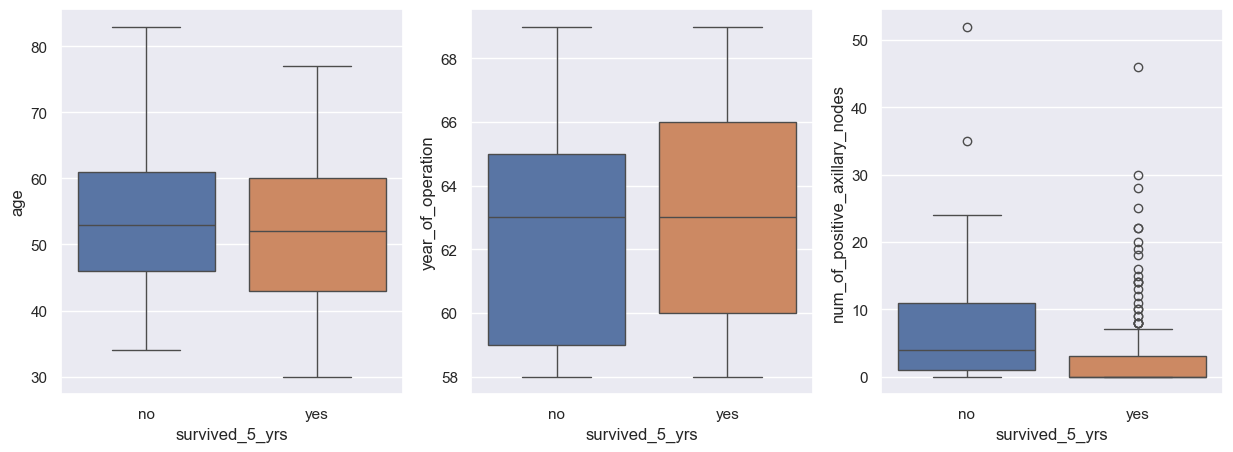

In [29]:
# 3. Box and Whisker Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
idx = 0
for feature in haberman.columns[:-1] :
    sns.boxplot(x='survived_5_yrs',y=feature, data=haberman, ax = axes[idx],hue='survived_5_yrs')
    idx += 1

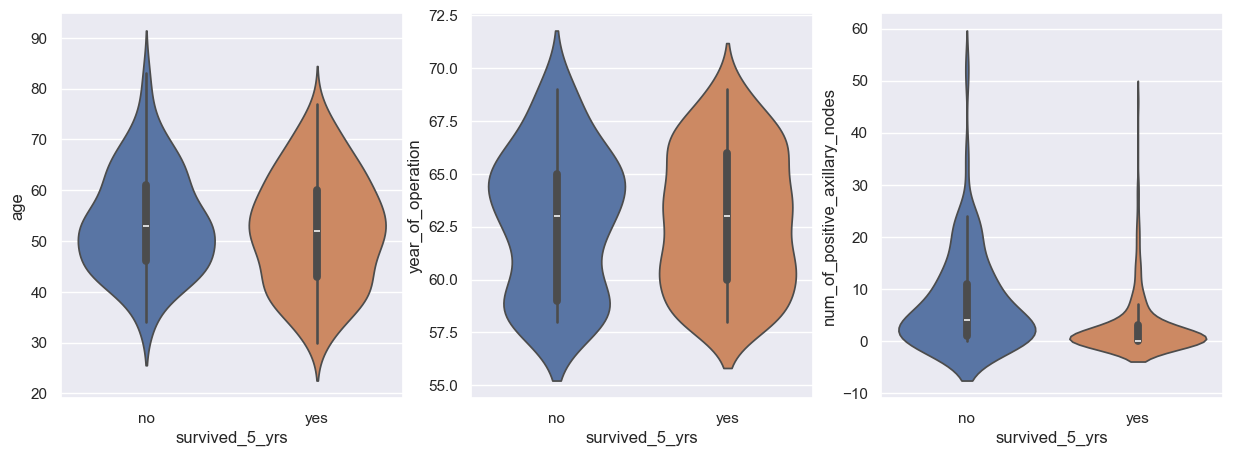

In [30]:
# 4. Violin Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
idx = 0
for feature in haberman.columns[:-1] :
    sns.violinplot(x='survived_5_yrs',y=feature, data=haberman, ax = axes[idx],hue='survived_5_yrs')
    idx += 1

Observations :

- From figure 1.3 and and figure 3.3 we can conclude that patients with less than 5 positive axillary nodes survive 5 or more years.
- From figure 2.3 we can conclude that almost 78% of patients have 5 or less positive axillary nodes.
- From figure 3.1 and figure 4.1 we can conclude that patients having age more than 76 while operation are less likely to survive 5 or more years when compared with others.
- From figure 3.2 and figure 4.2 we can conclude that patients getting operated after 1965 are more likely to survive 5 or more years when compared to others and patients getting operated before 1960 are less likely to survive 5 or more years than others.

## Bi-Variate Analysis

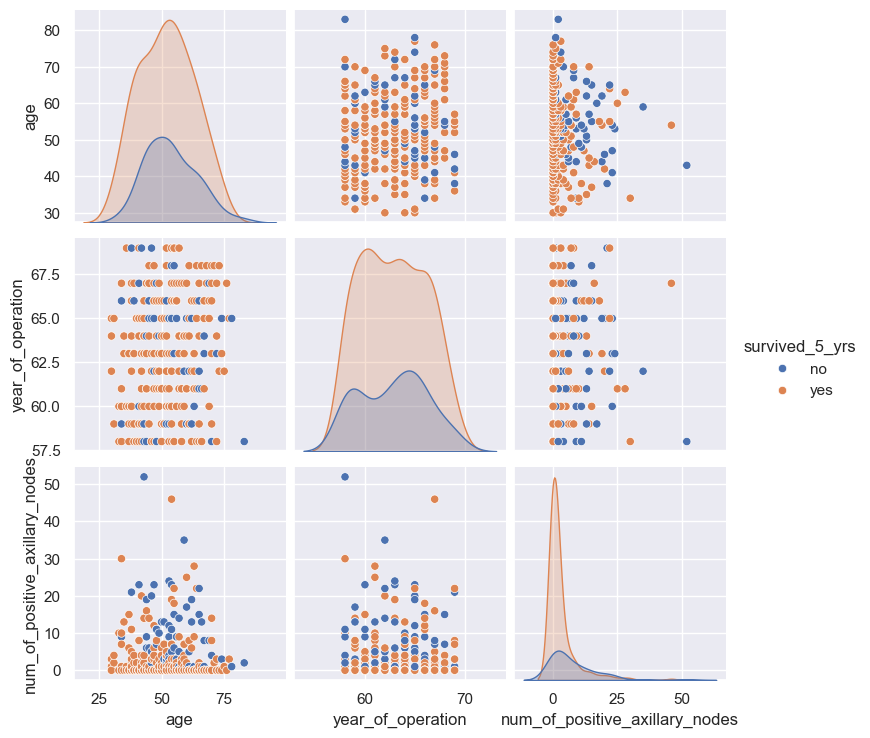

In [33]:
# pair plot
"""
Pair plot in seaborn plots the scatter plot between every two data columns in a given dataframe.
It is used to visualize the relationship between two variables
"""
sns.pairplot(haberman, hue='survived_5_yrs')
plt.show()

Obervations :

- From scatterplot "num_of_positive_axillary_nodes vs age" we can observe that regardless of age if patient has less than 5 positive axillary nodes then chances of surviving 5 years or more is high.
- From scatterplot "num_of_positive_axillary_nodes vs year_of_operation" we can observer better separation and can also observe lower the num of positive axillary nodes higher the chance to survive 5 or more years.